In [1]:
import os
os.chdir('../../src/models')

In [2]:
import networkx as nx
import seaborn as sns
import pandas as pd

In [3]:
G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

hosp_dict = {
    9:  0.001,
     19:  0.003,
     29:  0.012,
     39:  0.032,
     49:  0.049,
     59:  0.102,
     69:  0.166,
     79:  0.24 ,
     80:  0.273,
}

In [4]:
ages = [x['age'] for n,x in G.nodes(data=True)]

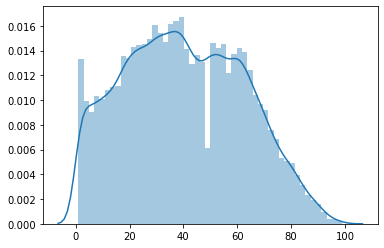

In [5]:
sns.distplot(ages)

In [6]:
bins = [0] + list(range(9, 89, 10)) + [100]
labels = bins[1:-1] + [80]

In [7]:
ages = pd.cut(ages, bins, labels=labels).value_counts()

In [8]:
df = pd.DataFrame([ages.values, hosp_dict.values()]).T
df

,0,1
0,5197.0,0.001
1,6321.0,0.003
2,7844.0,0.012
3,8581.0,0.032
4,7568.0,0.049
5,7537.0,0.102
6,6588.0,0.166
7,3714.0,0.240
8,2142.0,0.273


In [11]:
import numpy as np
(df[0] * df[1]).sum()/df[0].sum()

0.07392452966193323